In [1]:
import pandas as pd

# pd.read_excel("../dataset/2020국가생물종목록_v2.xlsx", engine = 'openpyxl')
xlsx = pd.read_excel("../dataset/2020국가생물종목록_v2.xlsx", sheet_name="통계")
xlsx.to_csv("../dataset/통계.csv")

In [2]:
life_list = [("동물계",31467), 
             ("포유류",125),
             ("조류",545), 
             ("파충류",32),
             ("양서류",22),
             ("어류",1304),
             ("미삭동물",129),
             ("무척추동물",10061),
             ("곤충류",19249),
             ("관속식물류",4596),
             ("식물계",8006),
             ("선태류",961),
             ("윤조류",957),
             ("녹조류",831),
             ("홍조류",661),
             ("유색조식물계",3092),
             ("돌말류",2223),
             ("은편모조류",15),
             ("착편모조류",7),
             ("와편모조류",452),
             ("황적조류",2),
             ("대롱편모조류",393),
             ("균계",5616),
             ("균류",4483),
             ("지의류",1133),
             ("원생동물계",2630),
             ("원생동물류",2256),
             ("유글레나조류",374),
             ("세균계",3595),
             ("남조류",388),
             ("세균류",3207),
             ("고세균계",22),
             ("고세균류",22)]

In [3]:
life_list = dict(life_list)
life_list

{'동물계': 31467,
 '포유류': 125,
 '조류': 545,
 '파충류': 32,
 '양서류': 22,
 '어류': 1304,
 '미삭동물': 129,
 '무척추동물': 10061,
 '곤충류': 19249,
 '관속식물류': 4596,
 '식물계': 8006,
 '선태류': 961,
 '윤조류': 957,
 '녹조류': 831,
 '홍조류': 661,
 '유색조식물계': 3092,
 '돌말류': 2223,
 '은편모조류': 15,
 '착편모조류': 7,
 '와편모조류': 452,
 '황적조류': 2,
 '대롱편모조류': 393,
 '균계': 5616,
 '균류': 4483,
 '지의류': 1133,
 '원생동물계': 2630,
 '원생동물류': 2256,
 '유글레나조류': 374,
 '세균계': 3595,
 '남조류': 388,
 '세균류': 3207,
 '고세균계': 22,
 '고세균류': 22}

In [4]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

korea = np.array(Image.open('../dataset/korea.png'))

wc = WordCloud(font_path='../dataset/HS유지체.ttf',
               mask = korea,
               background_color = "white")

wc.generate_from_frequencies(life_list)
wc.to_file('./picture/wordcloud_life.png')

True

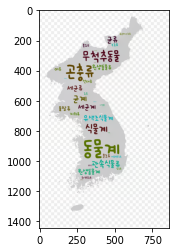

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

word = cv2.imread('./picture/wordcloud_life.png')
bg = cv2.imread('../dataset/korea.png')

h, w = bg.shape[:2]
center = (w//2, h//2)

mask = np.full_like(word, 255)

nomal  = cv2.seamlessClone(word, bg, mask, center, cv2.NORMAL_CLONE)
mixed  = cv2.seamlessClone(word, bg, mask, center, cv2.MIXED_CLONE)

plt.imshow(nomal)
plt.imshow(mixed)

cv2.imwrite("save_image.jpg", mixed)


In [6]:
xlsx_plus = pd.read_excel("../dataset/2020국가생물종목록_v2.xlsx", sheet_name="배포종목록", usecols = [7, 9, 11])
xlsx_plus.to_csv("../dataset/종목록.csv")

In [7]:
data = pd.read_csv("../dataset/종목록.csv", names=["P", "C", "O"])
data

,P,C,O
NaN,Unnamed: 7,Unnamed: 9,Unnamed: 11
0.0,국명,국명,국명
1.0,척삭동물문,포유동물강,우제목
2.0,척삭동물문,포유동물강,우제목
3.0,척삭동물문,포유동물강,우제목
...,...,...,...
54424.0,NaN,NaN,NaN
54425.0,NaN,NaN,NaN
54426.0,NaN,NaN,NaN
54427.0,NaN,NaN,NaN


In [8]:
data.nunique()

P     55
C    153
O    628
dtype: int64

In [9]:
P = data['P'].value_counts()
print(P)

절지동물문         24098
피자식물문          4204
자낭균문           3053
담자균문           2239
규조식물문          2223
척삭동물문          2157
연체동물문          1957
유공충문           1197
윤조식물문           957
녹조식물문           831
환형동물문           662
홍조식물문           661
선태식물문           647
섬모충문            623
선형동물문           590
와편모조식물문         452
해면동물문           414
대롱편모조식물문        393
자포동물문           392
남조식물문           388
유글레나식물문         374
양치식물문           337
윤형동물문           319
태류식물문           310
극피동물문           223
태형동물문           216
편형동물문           214
난균문             135
글로메로균문          100
첨복포자충문           76
접합균문             72
완보동물문            71
나자식물문            55
복모동물문            48
모악동물문            41
두문동물문            22
퍼콜로충문            18
유글레나문            16
은편모조식물문          15
점균문              13
유즐동물문            11
완족동물문             9
성구동물문             8
착편모조식물문           7
유선형동물문            7
각태류식물문            4
구두동물문             3
유형동물문             3
점액포자충문            2
황적조식물문            2


In [10]:
dictP = dict(P)
dictP

{'절지동물문': 24098,
 '피자식물문': 4204,
 '자낭균문': 3053,
 '담자균문': 2239,
 '규조식물문': 2223,
 '척삭동물문': 2157,
 '연체동물문': 1957,
 '유공충문': 1197,
 '윤조식물문': 957,
 '녹조식물문': 831,
 '환형동물문': 662,
 '홍조식물문': 661,
 '선태식물문': 647,
 '섬모충문': 623,
 '선형동물문': 590,
 '와편모조식물문': 452,
 '해면동물문': 414,
 '대롱편모조식물문': 393,
 '자포동물문': 392,
 '남조식물문': 388,
 '유글레나식물문': 374,
 '양치식물문': 337,
 '윤형동물문': 319,
 '태류식물문': 310,
 '극피동물문': 223,
 '태형동물문': 216,
 '편형동물문': 214,
 '난균문': 135,
 '글로메로균문': 100,
 '첨복포자충문': 76,
 '접합균문': 72,
 '완보동물문': 71,
 '나자식물문': 55,
 '복모동물문': 48,
 '모악동물문': 41,
 '두문동물문': 22,
 '퍼콜로충문': 18,
 '유글레나문': 16,
 '은편모조식물문': 15,
 '점균문': 13,
 '유즐동물문': 11,
 '완족동물문': 9,
 '성구동물문': 8,
 '착편모조식물문': 7,
 '유선형동물문': 7,
 '각태류식물문': 4,
 '구두동물문': 3,
 '유형동물문': 3,
 '점액포자충문': 2,
 '황적조식물문': 2,
 '호상균문': 2,
 '내항동물문': 1,
 '추형동물문': 1,
 '국명': 1,
 'Unnamed: 7': 1}

In [11]:
C = data['C'].value_counts()
dictC = dict(C)
dictC

{'곤충강': 18934,
 '목련강': 3026,
 '거미강': 2182,
 '주름버섯강': 1799,
 '윷돌말강': 1660,
 '복족강': 1309,
 '조기강': 1222,
 '백합강': 1178,
 '연갑강': 1145,
 '요각강': 1043,
 '접시지의강': 966,
 '접합조강': 907,
 '글로보탈라메아강': 746,
 '좌낭균강': 676,
 '진정홍조강': 621,
 '선강': 597,
 '이매패강': 548,
 '조강': 545,
 '동충하초강': 542,
 '녹조강': 531,
 '와편모조강': 449,
 '크로마도레아강': 413,
 '보통해면강': 400,
 '남조강': 388,
 '유글레나조강': 374,
 '다모강': 372,
 '선모강': 362,
 '진윤충강': 319,
 '두건버섯강': 312,
 '흰가시동충하초강': 309,
 '녹균강': 299,
 '환대강': 289,
 '톡토기강': 286,
 '고사리강': 286,
 '망울이끼강': 281,
 '체돌말강': 242,
 '히드라충강': 214,
 '갈조강': 200,
 '나후강': 189,
 '유침강': 177,
 '산호충강': 165,
 '갈파래강': 161,
 '흡충강': 160,
 '터보탈라메아강': 156,
 '난균강': 135,
 '포유동물강': 125,
 '새각강': 121,
 '패충강': 109,
 '해초강': 96,
 '시누라조강': 85,
 '빈막강': 76,
 '연골어강': 76,
 '효모균강': 74,
 '노래기강': 72,
 '거미불가사리강': 66,
 '리토스토마테강': 66,
 '불가사리강': 66,
 '주발버섯강': 61,
 '황색편모조강': 60,
 '흰목이강': 55,
 '지네강': 54,
 '소나무강': 53,
 '두족강': 50,
 '바다거미강': 45,
 '진완보강': 43,
 '시충강': 41,
 '조충강': 38,
 '해삼강': 38,
 '윤조강': 37,
 '성게강': 35,
 '황록조강': 35,
 '층상인두강': 34,


In [12]:
O = data['O'].value_counts()
dictO = dict(O)
print(dictO)

{'딱정벌레목': 4781, '나비목': 4216, '벌목': 4122, '파리목': 2468, '노린재목': 2256, '주름버섯목': 948, '거미목': 896, '쪽배돌말목': 725, '사초목': 698, '수레바퀴유공충목': 576, '농어목': 565, '십각목': 546, '접시지의목': 457, '날개응애목': 456, '국화목': 402, '유글레나목': 371, '간선충목': 360, '검물벼룩목': 353, '장미목': 348, '전기문목': 346, '그을음병균목': 337, '신복족목': 322, '중기문목': 307, '녹균목': 295, '갈고리노벌레목': 289, '백합목': 282, '단각목': 277, '총알고둥목': 274, '고사리목': 261, '비단풀목': 255, '긴노요각목': 253, '구멍장이버섯목': 241, '날도래목': 232, '흰가시동충하초목': 224, '병유공충목': 219, '참새목': 218, '동충하초목': 212, '무당버섯목': 212, '얇은공버섯목': 206, '윷돌말목': 180, '메뚜기목': 178, '반달돌말목': 174, '현삼목': 170, '미나리아재비목': 169, '쏨뱅이목': 169, '순구목': 168, '콩목': 168, '유영목': 167, '꿀풀목': 163, '부채발갯지렁이목': 163, '석죽목': 160, '붉은녹지의목': 156, '지렁이목': 154, '기장구멍벌레목': 149, '물톡토기목': 143, '김발돌말목': 141, '고무버섯목': 139, '컵히드라충목': 138, '그물버섯목': 138, '대롱입요각목': 138, '흰가루병균목': 138, '등각목': 135, '잠자리목': 134, '망울이끼목': 133, '미나리목': 121, '흔들말목': 120, '난초목': 120, '병안목': 117, '털보톡토기목': 116, '망각해면목': 113, '손톱지의목': 111, '별해캄목': 111, '선윤충목': 111, '도요목': 108,

In [13]:
all = dict(life_list.items( ) | dictP.items( ) | dictC.items( ) | dictO.items( ) )
print(all) 

{'주발버섯목': 61, '콩목': 168, '옛낫발이목': 4, '수수깜부기강': 20, '고사리목': 261, '석이목': 9, '아욱목': 38, '고설목': 25, '원지목': 5, '주름버섯목': 948, '딜레니아목': 5, '해세목': 11, '구두동물문': 3, '탈리아강': 25, '좌낭균강': 676, '주름방사륵조개목': 21, '등촉수별벌레강': 5, '애지네목': 2, '기러기목': 53, '고하목': 30, '양서강': 22, '와편모조강': 449, '촛농지의목': 5, '합막섬모충목': 2, '양서류': 22, '데스모도리다목': 33, '체돌말강': 242, '대롱입요각목': 138, '녹균강': 299, '폐구환소모충목': 20, '터보탈라메아강': 156, '질경이목': 8, '설치목': 20, '열두조충목': 7, '교초윤충목': 4, '기장구멍벌레목': 149, '곤쟁이목': 57, '대구목': 19, '단골해면목': 49, '흰가시동충하초강': 309, '돋보기말목': 52, '다구흡충목': 4, '구슬노래기목': 7, '극구흡충목': 36, '닭목': 4, '주목목': 4, '칼새목': 4, '지네강': 54, '고세균류': 22, '각태류식물문': 4, '사미목': 35, '콜포다섬모충강': 19, '옴진드기목': 36, '유글레나조강': 374, '와편모조식물문': 452, '편형동물문': 214, '닭의장풀목': 11, '미끈이별벌레목': 3, '산각목': 1, '고사리강': 286, '괭이상어목': 2, '층층나무목': 12, '곱슬이목': 6, '앨퉁이목': 2, '동문동물강': 21, '녹균목': 295, '기구해파리목': 6, '참진드기목': 51, '딱정벌레목': 4781, '구각목': 14, '플라기오피라강': 2, '해삼강': 38, '끈적이목': 5, '여을멸목': 3, '꼬리치목': 2, '숭어목': 7, '신충목': 1, '통거미목': 19, '먹장어강': 3, '깜부기균강': 31, '오리나무버

In [14]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

korea = np.array(Image.open('../dataset/korea.png'))

wc = WordCloud(font_path='../dataset/HS유지체.ttf',
               mask = korea,
               background_color = "white")

wc.generate_from_frequencies(all)
wc.to_file('./picture/wordcloud_life_plus.png')

True

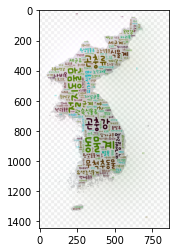

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

word = cv2.imread('./picture/wordcloud_life_plus.png')
bg = cv2.imread('../dataset/korea.png')

h, w = bg.shape[:2]
center = (w//2, h//2)

mask = np.full_like(word, 255)

normal  = cv2.seamlessClone(word, bg, mask, center, cv2.NORMAL_CLONE)
mixed  = cv2.seamlessClone(word, bg, mask, center, cv2.MIXED_CLONE)

plt.imshow(normal)
plt.imshow(mixed)

cv2.imwrite("./picture/plus_n.jpg", normal)
cv2.imwrite("./picture/plus_m.jpg", mixed)
